In [1]:
import os
import sys

import sklearn

import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
import plotly
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [3]:
from skimage import io

In [4]:
%matplotlib inline

In [5]:
__cwd__ = os.getcwd()

In [6]:
# create datasets
from intect.dataset import Dataset

NUMBER_DATA_PATH = 'dataset/num-dataset/augmented_images/'
LC_DATA_PATH = 'dataset/lowercase-dataset/augmented_images/'
UC_DATA_PATH = 'dataset/uppercase-dataset/augmented_images/'


num_dataset = Dataset.from_directory(directory=NUMBER_DATA_PATH)
lc_dataset = Dataset.from_directory(directory=LC_DATA_PATH)
uc_dataset = Dataset.from_directory(directory=UC_DATA_PATH)

Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 26 classes.
Found 2000 images belonging to 26 classes.


In [7]:
# restore estimators
from intect.estimator import Estimator

NUM_ESTIMATOR_CACHE = '.model_cache/numbers,lr=0.005,bs=32,conv=2,fcl=1/'
NUM_ESTIMATOR_ARCHITECTURE = 'dataset/num-dataset/num-architecture.yaml'

LC_ESTIMATOR_CACHE = '.model_cache/lowercase,lr=0.005,bs=100,conv=2,fcl=1/'
LC_ESTIMATOR_ARCHITECTURE = 'dataset/lowercase-dataset/lowercase-architecture.yaml'

UC_ESTIMATOR_CACHE = '.model_cache/uppercase,lr=0.005,bs=100,conv=2,fcl=1/'
UC_ESTIMATOR_ARCHITECTURE = 'dataset/uppercase-dataset/uppercase-architecture.yaml'


num_estimator = Estimator(
    model_architecture=NUM_ESTIMATOR_ARCHITECTURE,
    model_dir=NUM_ESTIMATOR_CACHE
)
lc_estimator = Estimator(
    model_architecture=LC_ESTIMATOR_ARCHITECTURE,
    model_dir=LC_ESTIMATOR_CACHE
)
uc_estimator = Estimator(
    model_architecture=UC_ESTIMATOR_ARCHITECTURE,
    model_dir=UC_ESTIMATOR_CACHE
)

INFO:tensorflow:Using config: {'_model_dir': '.model_cache/numbers,lr=0.005,bs=32,conv=2,fcl=1/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc8addc1080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': '.model_cache/lowercase,lr=0.005,bs=100,conv=2,fcl=1/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tr

In [8]:
# make predictions - numbers
num_pred = list(num_estimator.predict(images=num_dataset))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .model_cache/numbers,lr=0.005,bs=32,conv=2,fcl=1/model.ckpt-1135
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [9]:
# make predictions - lowercase
lc_pred = list(lc_estimator.predict(images=lc_dataset))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .model_cache/lowercase,lr=0.005,bs=100,conv=2,fcl=1/model.ckpt-1323
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [10]:
# make predictions - lowercase
uc_pred = list(uc_estimator.predict(images=uc_dataset))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from .model_cache/uppercase,lr=0.005,bs=100,conv=2,fcl=1/model.ckpt-1323
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [11]:
# confusion matrices - numbers
n_classes = len(num_dataset.classes)
num_confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.float16)

for pred, label in zip(num_pred, np.argmax(num_dataset.labels, axis=1)):
    pred_id = int(pred['cls_id'])
    num_confusion_matrix[pred_id, label] += 1
    
# confusion matrices - lowercase
n_classes = len(lc_dataset.classes)
lc_confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.float16)

for pred, label in zip(lc_pred, np.argmax(lc_dataset.labels, axis=1)):
    pred_id = int(pred['cls_id'])
    lc_confusion_matrix[pred_id, label] += 1
    
# confusion matrices - uppercase
n_classes = len(uc_dataset.classes)
uc_confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.float16)

for pred, label in zip(uc_pred, np.argmax(uc_dataset.labels, axis=1)):
    pred_id = int(pred['cls_id'])
    uc_confusion_matrix[pred_id, label] += 1

In [12]:
# normalize confusion matrices
for confusion_matrix in [num_confusion_matrix, lc_confusion_matrix, uc_confusion_matrix]:
    for axis in range(confusion_matrix.shape[1]):
        confusion_matrix[:, axis] /= np.sum(confusion_matrix[:, axis])

In [13]:
def plot_confusion_matrix_sns(data, labels, **kwargs):
    """Visualize confusion matrix as a heat map."""
    col_map = kwargs.pop('cmap', sns.light_palette('navy', n_colors=5, as_cmap=False))
        
    sns.heatmap(
        vmin=0.0,
        vmax=1.0,
        data=data,
        cmap=col_map,
        xticklabels=labels,
        yticklabels=labels,
        linewidths=kwargs.pop('linewidths', 0.75),
        annot=kwargs.pop('annot', False),
        **kwargs
    )

/home/macermak/code/thesis/intect/env/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



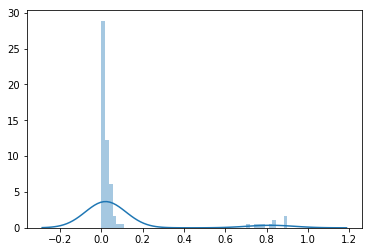

In [14]:
sns.distplot(num_confusion_matrix.flatten(), kde=True)

/home/macermak/code/thesis/intect/env/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



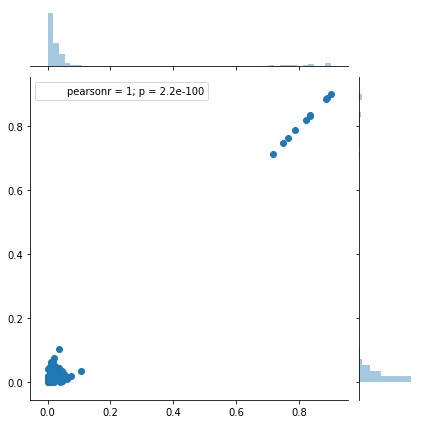

In [15]:
x = np.array([num_confusion_matrix[i, :] for i in range(num_confusion_matrix.shape[0])])
y = np.array([num_confusion_matrix[:, j] for j in range(num_confusion_matrix.shape[1])])

sns.jointplot(x, y)

In [16]:
from matplotlib.colors import LinearSegmentedColormap

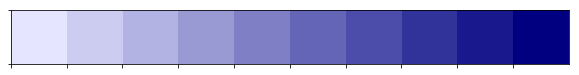

In [17]:
sns.palplot(sns.light_palette('navy', n_colors=10, as_cmap=False))

In [18]:
num_labels = sorted(
    [chr(int(val)) for val in num_dataset.classes.values()]
)

lc_labels = sorted(
    [chr(int(val)) for val in lc_dataset.classes.values()]
)

uc_labels = sorted(
    [chr(int(val)) for val in uc_dataset.classes.values()]
)

In [19]:
# visualize confusion matrices - numbers
boundaries = [0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)

In [20]:
# plotly

In [21]:
from plotly import figure_factory

In [22]:
idx = np.ndindex(num_confusion_matrix.shape)

In [23]:
def plot_confusion_matrix(data, labels, title=None):
    annotations = np.empty(data.shape).astype(np.unicode_)
    
    for idx in np.ndindex(data.shape):
        val = data[idx]
        annotations[idx] = ["", "{:.2f}".format(val)][val != 0.0]

    fig = figure_factory.create_annotated_heatmap(
        z=data,
        x=labels,
        y=labels,
        annotation_text=annotations.tolist(),
        colorscale=colors,
        xgap=1.25,
        ygap=1.25,
        showscale=True,
        colorbar={
            'tickmode': 'array',
        },
    )
    
    if title:
        fig.layout.title = title
    
    fig.layout.xaxis.title = "Predicted values"
    fig.layout.xaxis.side = "bottom"
    
    fig.layout.yaxis.anchor = "bottom"
    fig.layout.yaxis.title = "True values"
    
    iplot(fig, show_link=False)

In [24]:
plot_confusion_matrix(num_confusion_matrix, num_labels, title='Confusion Matrix of Number NN')

/home/macermak/code/thesis/intect/env/lib64/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



In [25]:
from plotly import tools

In [26]:
plot_confusion_matrix(lc_confusion_matrix[13:, 13:], lc_labels[13:], title='Confusion Matrix of Lowercase NN')
plot_confusion_matrix(lc_confusion_matrix[:13, :13], lc_labels[:13])

/home/macermak/code/thesis/intect/env/lib64/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



In [27]:
plot_confusion_matrix(uc_confusion_matrix[13:, 13:], uc_labels[13:], title='Confusion Matrix of Uppercase NN')
plot_confusion_matrix(uc_confusion_matrix[:13, :13], uc_labels[:13])

/home/macermak/code/thesis/intect/env/lib64/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index

